In [1]:
#THINGS TO ADD:

#charts and graphs


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
from textblob import TextBlob
import tensorflow as tf
from tensorflow import keras
import nltk
import string
import scipy
from nltk.stem import WordNetLemmatizer

In [3]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

In [4]:
from nltk import WordPunctTokenizer

In [246]:
x_train_df = pd.read_csv('data/data_reviews/x_train.csv')
y_train_df = pd.read_csv('data/data_reviews/y_train.csv')

tr_text_list = x_train_df['text'].values.tolist()

In [78]:
x_test_df = pd.read_csv('data/data_reviews/x_test.csv')

test_text_list = x_test_df['text'].values.tolist()

In [79]:
train_df = pd.merge(x_train_df, y_train_df, left_index=True, right_index=True)

In [80]:
train_chart_one = pd.DataFrame(train_df[['website_name','is_positive_sentiment']].value_counts())

In [81]:
train_chart_one

0
website_name is_positive_sentiment     
amazon       0                      400
             1                      400
imdb         0                      400
             1                      400
yelp         0                      400
             1                      400

In [82]:
test_chart_one = pd.DataFrame(x_test_df['website_name'].value_counts())


In [83]:
print(test_chart_one)

        website_name
imdb             200
yelp             200
amazon           200


In [84]:
from sklearn.preprocessing import OneHotEncoder

In [85]:
onehot = OneHotEncoder(sparse=False)


In [86]:
train_sites = np.array(x_train_df.website_name)
test_sites = np.array(x_test_df.website_name)

In [87]:
train_onehot_encoded = onehot.fit_transform(train_sites.reshape(-1,1))
test_onehot_encoded = onehot.transform(test_sites.reshape(-1,1))


In [88]:
train_text_lengths = np.zeros(len(x_train_df))
test_text_lengths = np.zeros(len(x_test_df))

In [89]:
for i in range(len(train_text_lengths)):
    train_text_lengths[i] = len(x_train_df.text[i])

for i in range(len(test_text_lengths)):
    test_text_lengths[i] = len(x_test_df.text[i])


In [90]:
#min max scale the lengths

for i in range(len(train_text_lengths)):
    train_text_lengths[i] = (train_text_lengths[i] - min(train_text_lengths))/(max(train_text_lengths)-min(train_text_lengths))


for i in range(len(test_text_lengths)):
    test_text_lengths[i] = (test_text_lengths[i] - min(train_text_lengths))/(max(train_text_lengths)-min(train_text_lengths))



In [91]:
train_meta_data = np.hstack((train_onehot_encoded,train_text_lengths.reshape(-1,1)))
test_meta_data = np.hstack((test_onehot_encoded,test_text_lengths.reshape(-1,1)))


In [92]:
print(train_meta_data)

[[1.         0.         0.         0.20972644]
 [1.         0.         0.         0.08276081]
 [1.         0.         0.         0.05333825]
 ...
 [0.         0.         1.         0.20391303]
 [0.         0.         1.         1.        ]
 [0.         0.         1.         1.        ]]


In [93]:
stopword_list = nltk.corpus.stopwords.words('english') #removes words like 'the', 'a','is'

In [94]:
stopword_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [95]:
def convert_to_arr(y_df):
    y_ar = np.array(y_df)
    y_train_ar = np.zeros(len(y_ar))
    for i in range(len(y_ar)):
        y_train_ar[i] = y_ar[i][0]
    return y_train_ar

In [96]:
y_train = convert_to_arr(y_train_df)


In [24]:
#removes punctuation and makes lowercase
#fixes spelling errors

def blob(sent):
    sent = sent.translate(str.maketrans('','',string.punctuation)).lower() #make lower case and remove punctuation
    sent = sent.translate(str.maketrans('', '', string.digits)) # remove numbers
    blb = TextBlob(sent)
    sent = blb.correct().string
    return sent

In [25]:
lemmatizer = WordNetLemmatizer()
#attempts to modify words to base word
def lemma(sent):
    sent_list = sent.split()
    new_sent = ''
    for i in sent_list:
        new = lemmatizer.lemmatize(i)
        new_sent = new_sent + new + ' '
    new_sent = new_sent.strip()
    return new_sent


In [26]:
len(y_train_df[y_train_df.is_positive_sentiment == 1])/len(y_train_df) #equal amounts of positive and negative reviews

0.5

In [27]:
retain_words = ['not', 'nor','no','don',"don't",'very','aren',
 "aren't",
 'couldn',
 "couldn't",
 'didn',
 "didn't",
 'doesn',
 "doesn't",
 'hadn',
 "hadn't",
 'hasn',
 "hasn't",
 'haven',
 "haven't",
 'isn',
 "isn't",
 'mightn',
 "mightn't",
 'mustn',
 "mustn't",
 'needn',
 "needn't",
 'shan',
 "shan't",
 'shouldn',
 "shouldn't",
 'wasn',
 "wasn't",
 'weren',
 "weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't"]

In [28]:
for x in stopword_list:
    if x in retain_words:
        stopword_list.remove(x)

In [29]:
stopword_list.remove("doesn't")
stopword_list.remove("isn't")
stopword_list.remove("won't")
print(stopword_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', 's', 't

In [60]:
'''def remove_stops(sent):
    text = sent.copy()
    for i in range(len(text)):
        toks = text[i].split()
        toks = [tok.strip() for tok in toks]
        filt_toks = [tok for tok in toks if tok not in stopword_list]
        text[i] = ' '.join(filt_toks)
    return text

x_tr_short = remove_stops(tr_text_list)
x_test_short = remove_stops(test_text_list)
import re

def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text


x_tr_short = pd.DataFrame(x_tr_short, columns=['text'])
x_test_short = pd.DataFrame(x_test_short, columns =['text'])
x_tr_short=x_tr_short['text'].apply(remove_special_characters)
x_test_short=x_test_short['text'].apply(remove_special_characters)
x_tr_norm = x_tr_short.apply(blob)
x_test_norm = x_test_short.apply(blob)
x_tr_norm_list = []
x_test_norm_list = []

for item in x_tr_norm:
    x_tr_norm_list.append(item)

for item in x_test_norm:
    x_test_norm_list.append(item)
'''


In [83]:
'''with open('x_tr_norm_list.txt','w', encoding='utf-8') as filehandle:
    for listitem in x_tr_norm_list:
        filehandle.write(f'{listitem}\n')'''

In [84]:
'''with open('x_test_norm_list.txt','w', encoding='utf-8') as filehandle:
    for listitem in x_test_norm_list:
        filehandle.write(f'{listitem}\n')'''

In [52]:
with open("C:\\Users\\Joe\\Desktop\\Tufts Fall 2022\\CS 135\\project02\\x_tr_norm_list.txt", 'r') as filehandle:
    x_tr_norm_list=[current_place.rstrip() for current_place in filehandle.readlines()]

In [53]:
with open("C:\\Users\\Joe\\Desktop\\Tufts Fall 2022\\CS 135\\project02\\x_test_norm_list.txt", 'r') as filehandle:
    x_test_norm_list=[current_place.rstrip() for current_place in filehandle.readlines()]

In [54]:
x_test_norm_list[0:5]

['technically film well made impressive camerawork solid acting effective music rid ortolani  particularly good recurring unaccompanied female vocal sounds like coming distant hill',
 'the owners really really need quit soooooo cheap let wrap breaking sandwich two papers not one',
 'disappointment',
 'the movie terribly boring places',
 'one best mexican moves ever one less understood even mexican themselves no matter identified felt it']

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [247]:
300/4100

0.07317073170731707

In [316]:
tv = TfidfVectorizer()
#tv = TfidfVectorizer(max_df=.30, max_features=1200)

In [317]:
x_train_tfidf = tv.fit_transform(x_tr_norm_list)
x_test_tfidf = tv.transform(x_test_norm_list)

In [318]:
x_train_tfidf.shape

(2400, 4138)

In [319]:
tv.vocabulary_

{'oh': 2478,
 'forgot': 1466,
 'also': 101,
 'mention': 2257,
 'weird': 4008,
 'color': 664,
 'effect': 1143,
 'phone': 2648,
 'that': 3616,
 'one': 2491,
 'didn': 981,
 'work': 4087,
 'either': 1152,
 'waste': 3976,
 'bucks': 446,
 'product': 2790,
 'useless': 3874,
 'since': 3272,
 'not': 2440,
 'enough': 1200,
 'charging': 572,
 'current': 866,
 'charge': 568,
 'cellphones': 544,
 'planning': 2678,
 'use': 3870,
 'with': 4065,
 'none': 2428,
 'three': 3657,
 'sizes': 3289,
 'sent': 3179,
 'heads': 1684,
 'would': 4106,
 'stay': 3426,
 'ears': 1124,
 'worst': 4101,
 'customer': 870,
 'service': 3191,
 'the': 3618,
 'engage': 1192,
 'still': 3448,
 'lacking': 1996,
 'earbuds': 1117,
 'it': 1921,
 'always': 105,
 'cuts': 877,
 'makes': 2181,
 'been': 312,
 'sound': 3362,
 'says': 3112,
 'signal': 3258,
 'failed': 1314,
 'very': 3909,
 'disappointing': 1006,
 'thing': 3636,
 'no': 2419,
 'speakerphone': 3382,
 'disappointed': 1005,
 'accessoryone': 20,
 'basically': 287,
 'bad': 254,
 '

In [320]:
type(x_train_tfidf)

scipy.sparse._csr.csr_matrix

In [321]:
x_test_tfidf.shape

(600, 4138)

In [322]:
#Combine the meta data backinto the tfidfs

In [323]:
x_train_ifdf_non_sparse = scipy.sparse.csr_matrix.toarray(x_train_tfidf)
x_test_ifdf_non_sparse = scipy.sparse.csr_matrix.toarray(x_test_tfidf)

In [324]:
print(x_train_ifdf_non_sparse.shape)
#print(train_meta_data.shape)

(2400, 4138)


In [325]:
meta = False

if meta:
    x_train_full = np.hstack((train_meta_data,x_train_ifdf_non_sparse))
    x_test_full = np.hstack((test_meta_data,x_test_ifdf_non_sparse))
else:
    x_train_full = x_train_ifdf_non_sparse
    x_test_full = x_test_ifdf_non_sparse

In [326]:
#make sparse again
x_train_sparse = scipy.sparse.csr_matrix(x_train_full)
x_test_sparse = scipy.sparse.csr_matrix(x_test_full)

In [395]:
#x_train, x_val, y_train, y_val = train_test_split(x_tfidf,y_train_df, test_size = .2, random_state=2)
#shouldn't need this since cross validation is being built into the models

In [44]:
from sklearn.linear_model import LogisticRegressionCV

In [10]:
ratios = np.linspace(0,1,5)
strengths = np.logspace(-2, 2, 5)
results = np.zeros(len(ratios)*len(strengths)).reshape(len(ratios),len(strengths))

In [398]:
log_model = LogisticRegressionCV(Cs=strengths, cv=5, solver='saga',penalty='elasticnet', l1_ratios=ratios,max_iter=3000)

In [399]:
log_model.fit(x_train_sparse, y_train)

c:\Users\Joe\miniconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegressionCV(Cs=array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), cv=5,
                     l1_ratios=array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
                     max_iter=3000, penalty='elasticnet', solver='saga')

In [5]:
import pickle
'''log_model_file = 'log_model_file_full_size_vocab.sav'
pickle.dump(log_model, open(log_model_file,'wb'))'''
log_model = pickle.load(open('log_model_file_full_size_vocab.sav', 'rb'))

In [6]:
log_model.scores_

{1.0: array([[[0.825     , 0.5       , 0.5       , 0.5       , 0.5       ],
         [0.82708333, 0.76666667, 0.67916667, 0.63541667, 0.63541667],
         [0.8375    , 0.82916667, 0.82083333, 0.825     , 0.81041667],
         [0.83541667, 0.83333333, 0.82916667, 0.83541667, 0.82083333],
         [0.82708333, 0.81875   , 0.81666667, 0.8125    , 0.8125    ]],
 
        [[0.79166667, 0.5       , 0.5       , 0.5       , 0.5       ],
         [0.80625   , 0.69375   , 0.64583333, 0.60833333, 0.60833333],
         [0.8375    , 0.81458333, 0.81458333, 0.7875    , 0.77708333],
         [0.8375    , 0.84166667, 0.8375    , 0.82916667, 0.81666667],
         [0.80416667, 0.80208333, 0.80208333, 0.80625   , 0.78541667]],
 
        [[0.7125    , 0.5       , 0.5       , 0.5       , 0.5       ],
         [0.73125   , 0.60833333, 0.57708333, 0.55208333, 0.54791667],
         [0.78333333, 0.77708333, 0.75833333, 0.74166667, 0.71875   ],
         [0.79166667, 0.79375   , 0.79375   , 0.7875    , 0.7625  

In [7]:
val_errs = log_model.scores_[1.0]


In [8]:
avg_val_std_dev = np.zeros(25).reshape(5,5)

for i in range(val_errs.shape[2]):
    for j in range(val_errs.shape[0]):
        avg_val_std_dev[i][j] = np.std(val_errs[i][j])

In [11]:
log_model_validation_stddevs = pd.DataFrame(avg_val_std_dev, index=ratios, columns=strengths)

In [12]:
log_model_validation_stddevs

,0.01,0.10,1.00,10.00,100.00
0.00,0.130000,0.076142,0.008975,0.005496,0.005368
0.25,0.116667,0.073873,0.021530,0.008898,0.007454
0.50,0.085000,0.067490,0.023622,0.011888,0.015287
0.75,0.100000,0.067004,0.009354,0.009718,0.015138
1.00,0.119167,0.064692,0.015557,0.001559,0.013756


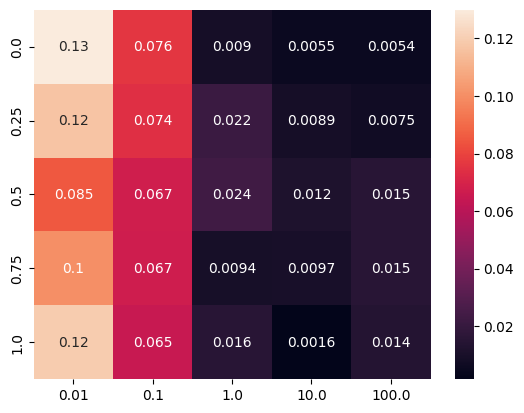

In [165]:
sns.heatmap(log_model_validation_stddevs, annot=True)
plt.show;

In [49]:
avg_val_errs = np.zeros(25).reshape(5,5)

for i in range(val_errs.shape[2]):
    for j in range(val_errs.shape[0]):
        avg_val_errs[i][j] = sum(val_errs[i][j])/5



In [50]:
log_model_validation_accuracies = pd.DataFrame(avg_val_errs, index= ratios, columns=strengths)

In [51]:
log_model_validation_accuracies
#columns are C value (inverse of regulation strength)
#rows are the l1_ratios, 0 = all l2

,0.01,0.10,1.00,10.00,100.00
0.00,0.565000,0.708750,0.824583,0.830833,0.817500
0.25,0.558333,0.672500,0.806250,0.832500,0.800000
0.50,0.542500,0.603333,0.755833,0.785833,0.776250
0.75,0.550000,0.637500,0.768333,0.775417,0.764583
1.00,0.559583,0.694583,0.817083,0.829583,0.810417


In [406]:
#log_model_validation_accuracies.to_pickle('log_model_validation_accuracies.pkl')
#log_model_validation_accuracies =pd.read_pickle('log_model_validation_accuracies.pkl')
#log_model_validation_accuracies

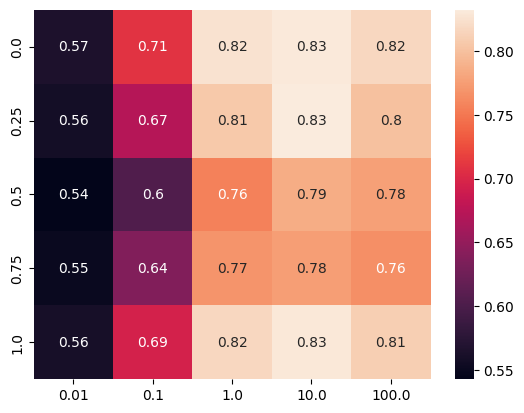

In [164]:
plt.figure()
plt.xlabel('Inverse Regularization Strength')
plt.ylabel('Percentage l1')

sns.heatmap(log_model_validation_accuracies, annot=True)
plt.show;

In [53]:
log_model.score(x_train_sparse, y_train)

0.9908333333333333

In [409]:
#The model is definitely overfit like bananas, but does increasing regularization further actually help?

In [54]:
high_regs = [.00001, .0001, .001, .01]
reg_log_model = LogisticRegressionCV(Cs=high_regs, cv=5, penalty='l2', max_iter=1000)

In [55]:
reg_log_model.fit(x_train_sparse,y_train)

LogisticRegressionCV(Cs=[1e-05, 0.0001, 0.001, 0.01], cv=5, max_iter=1000)

In [57]:
reg_log_model.score(x_train_sparse,y_train)

0.8775

In [58]:
reg_y_hat = reg_log_model.predict(x_test_sparse)

In [59]:
sum(reg_y_hat)

291.0

In [131]:
print(log_model.C_)
print(log_model.l1_ratio_)

[10.]
[0.]


In [62]:
np.savetxt('yproba1_test.txt', reg_y_hat)

In [65]:
#Spin from logistic regression:
#we tested various vocab sizes, and found htat even though it led to overfitting, the full feature set led to better predictions
#additionally, we tested increasing regularization on our best elasticnet configuration and found that heavier regularization led to worse predicttions

In [74]:
#SVM

In [259]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

In [260]:
# We are testing the kernel and the regularization, even though it's only 2 kernels, i checked gammas and 'scale' is the only good one

In [261]:
strat = StratifiedKFold(n_splits=5)

In [262]:
testx = x_train_sparse.copy()
testy = np.copy(y_train)

In [263]:
strengths = list(np.logspace(-2,2,5))
kernels = ['rbf', 'sigmoid', 'linear', 'poly']

In [264]:
svm_training_accuracies = np.zeros(5*5*4).reshape(4, 5, 5)
svm_validation_accuracies = np.copy(svm_training_accuracies)

In [265]:
mod_count = 0
for kernel in kernels:
    for strength in strengths:
        for train_index, test_index in strat.split(testx,testy):
            fold = mod_count % 5
            kern_mod = SVC(C=strength, kernel=kernel, gamma='scale', random_state=1, probability=False)
            x_train_kern = testx[train_index]
            y_train_kern = testy[train_index]
            x_val_kern = testx[test_index]
            y_val_kern = testy[test_index]

            kern_mod.fit(x_train_kern, y_train_kern)
            train_acc = kern_mod.score(x_train_kern, y_train_kern)
            val_acc = kern_mod.score(x_val_kern, y_val_kern)

            svm_training_accuracies[kernels.index(kernel)][strengths.index(strength)][fold] = train_acc
            svm_validation_accuracies[kernels.index(kernel)][strengths.index(strength)][fold] = val_acc

            mod_count += 1


In [266]:
svm_validation_accuracies[3]

array([[0.575     , 0.54791667, 0.51041667, 0.52708333, 0.54583333],
       [0.59791667, 0.57916667, 0.525     , 0.54375   , 0.56041667],
       [0.7375    , 0.71875   , 0.66875   , 0.71875   , 0.73958333],
       [0.725     , 0.68125   , 0.60208333, 0.66666667, 0.70833333],
       [0.67916667, 0.65625   , 0.58541667, 0.6375    , 0.6625    ]])

In [267]:
avg_svm_train_accuracies = np.zeros(20).reshape(4,5)
avg_svm_val_accuracies = np.zeros(20).reshape(4,5)
svm_train_stddev = np.copy(avg_svm_val_accuracies)
svm_val_stddev = np.copy(avg_svm_val_accuracies)

for i in range(svm_validation_accuracies.shape[0]):
    for j in range(svm_validation_accuracies.shape[1]):
        avg_svm_val_accuracies[i][j] = sum(svm_validation_accuracies[i][j])/5
        svm_val_stddev[i][j] = np.std(svm_validation_accuracies[i][j])

for i in range(svm_validation_accuracies.shape[0]):
    for j in range(svm_validation_accuracies.shape[1]):
        avg_svm_train_accuracies[i][j] = sum(svm_training_accuracies[i][j])/5
        svm_train_stddev[i][j] = np.std(svm_training_accuracies[i][j])



In [268]:
''''avg_svm_val_accuracies = avg_svm_val_accuracies.transpose()
avg_svm_train_accuracies = avg_svm_train_accuracies.transpose()
svm_train_stddev = svm_train_stddev.transpose()
svm_val_stddev = svm_val_stddev.transpose()
'''

"'avg_svm_val_accuracies = avg_svm_val_accuracies.transpose()\navg_svm_train_accuracies = avg_svm_train_accuracies.transpose()\nsvm_train_stddev = svm_train_stddev.transpose()\nsvm_val_stddev = svm_val_stddev.transpose()\n"

In [269]:
svm_train_accuracy_df = pd.DataFrame(avg_svm_train_accuracies, index=kernels, columns=strengths)
svm_val_accuracy_df = pd.DataFrame(avg_svm_val_accuracies,index=kernels, columns=strengths)
svm_train_stddev_df = pd.DataFrame(svm_train_stddev, index=kernels, columns=strengths)
svm_val_stddev_df = pd.DataFrame(svm_val_stddev, index=kernels, columns=strengths)



In [270]:
svm_val_stddev_df

,0.01,0.10,1.00,10.00,100.00
rbf,0.051258,0.048545,0.028988,0.032596,0.032447
sigmoid,0.038833,0.051225,0.020429,0.019570,0.017922
linear,0.040706,0.050294,0.026764,0.023511,0.019392
poly,0.021707,0.025638,0.025550,0.042480,0.032259


In [271]:
svm_train_accuracy_df

,0.01,0.10,1.00,10.00,100.00
rbf,0.615625,0.703542,0.921250,0.962187,0.962187
sigmoid,0.612187,0.765625,0.774479,0.660000,0.662396
linear,0.619687,0.779167,0.825625,0.844167,0.849479
poly,0.564792,0.627500,0.956250,0.962187,0.962187


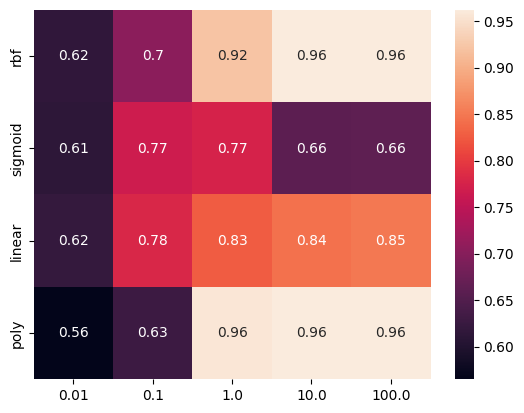

In [272]:
sns.heatmap(svm_train_accuracy_df, annot=True)
plt.show;

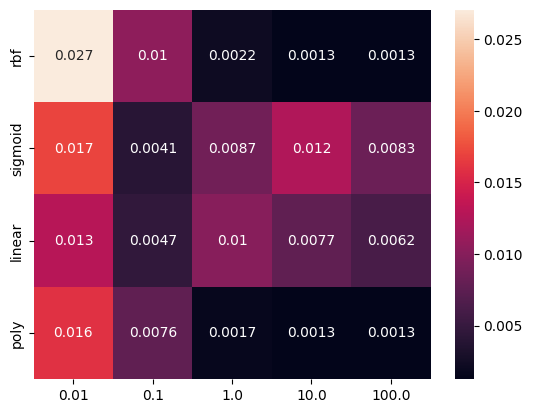

In [273]:
sns.heatmap(svm_train_stddev_df, annot=True)
plt.show;

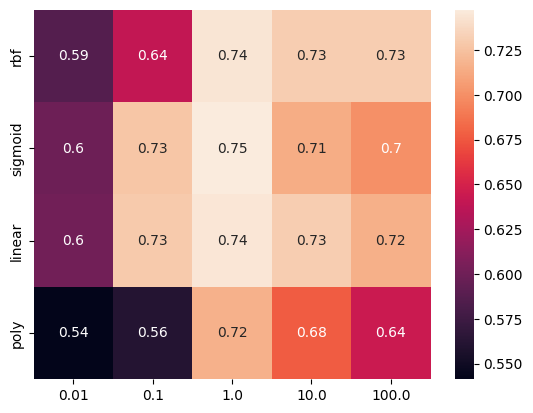

In [274]:
sns.heatmap(svm_val_accuracy_df, annot=True)
plt.show;

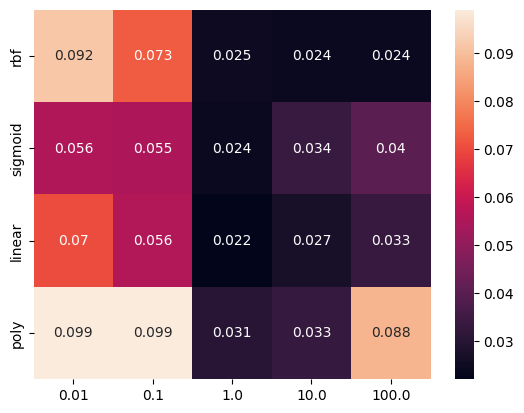

In [185]:
sns.heatmap(svm_val_stddev_df, annot=True)
plt.show;

In [187]:
sig_mod = SVC(C=1, kernel='rbf', gamma='scale')
sig_mod.fit(testx, testy)


SVC(C=1)

In [188]:
svm_y_hat = sig_mod.predict(x_test_sparse)

In [189]:
sum(svm_y_hat)

262.0

In [427]:
np.savetxt('yproba1_test.txt', svm_y_hat)

0.08

In [ ]:
#NEURAL NETWORKS

In [ ]:
#MLP

In [67]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [72]:
.1 **-np.arange(-4,1)

array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])

In [73]:
try_params = {
    'hidden_layer_sizes': [(32,), (64,), (64, 32), (64, 16), (64, 32, 16)],
    'alpha': .1 **-np.arange(-4,1)
}

In [74]:
network = MLPClassifier(hidden_layer_sizes=((128,)), max_iter=400, batch_size = 32,random_state=13)

In [244]:
#network.fit(x_tfidf, y_train)

MLPClassifier(batch_size=32, hidden_layer_sizes=(128,), max_iter=400,
              random_state=13)

In [75]:
gscv = GridSearchCV(network, try_params, cv=5, n_jobs=-1, verbose=3, return_train_score=True)


In [97]:
gscv.fit(x_train_sparse, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5,
             estimator=MLPClassifier(batch_size=32, hidden_layer_sizes=(128,),
                                     max_iter=400, random_state=13),
             n_jobs=-1,
             param_grid={'alpha': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00]),
                         'hidden_layer_sizes': [(32,), (64,), (64, 32),
                                                (64, 16), (64, 32, 16)]},
             return_train_score=True, verbose=3)

In [100]:
gscv.best_score_

0.8158333333333333

In [436]:
#gscv.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_alpha', 'param_hidden_layer_sizes', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [101]:
mlp_y_hat = gscv.predict(x_test_tfidf)

In [102]:
sum(mlp_y_hat)

281.0

In [103]:
np.savetxt('yproba1_test.txt', mlp_y_hat)

In [98]:
with open('mlp_gscv_results.pkl','wb') as f:
    pickle.dump(gscv.cv_results_,f)

In [208]:
with open('mlp_gscv_results.pkl','rb') as f:
    gscv_results = pickle.load(f)

In [209]:
gscv_results.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_alpha', 'param_hidden_layer_sizes', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [210]:
gscv_df = pd.DataFrame(gscv_results)

In [211]:
gscv_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,409.527088,69.650121,0.006433,0.006019,0.0001,"(32,)","{'alpha': 0.00010000000000000002, 'hidden_laye...",0.804167,0.812500,0.781250,...,0.794167,0.015557,12,0.998958,0.999479,1.000000,1.000000,0.998958,0.999479,0.000466
1,680.979900,152.802551,0.016516,0.008523,0.0001,"(64,)","{'alpha': 0.00010000000000000002, 'hidden_laye...",0.806250,0.806250,0.781250,...,0.794583,0.014530,11,0.998958,0.999479,1.000000,1.000000,0.998958,0.999479,0.000466
2,342.715524,52.330778,0.021936,0.015903,0.0001,"(64, 32)","{'alpha': 0.00010000000000000002, 'hidden_laye...",0.808333,0.800000,0.781250,...,0.792917,0.016436,15,0.999479,0.999479,1.000000,1.000000,0.999479,0.999687,0.000255
3,434.578155,92.664258,0.011330,0.008455,0.0001,"(64, 16)","{'alpha': 0.00010000000000000002, 'hidden_laye...",0.789583,0.789583,0.783333,...,0.788333,0.013411,17,0.999479,0.999479,1.000000,1.000000,0.999479,0.999687,0.000255
4,277.853669,44.585717,0.004998,0.006198,0.0001,"(64, 32, 16)","{'alpha': 0.00010000000000000002, 'hidden_laye...",0.800000,0.791667,0.793750,...,0.793750,0.007336,13,0.999479,0.999479,1.000000,1.000000,0.999479,0.999687,0.000255
5,557.415396,103.764636,0.007859,0.002045,0.001,"(32,)","{'alpha': 0.0010000000000000002, 'hidden_layer...",0.816667,0.793750,0.781250,...,0.797500,0.015501,9,0.998958,0.999479,1.000000,1.000000,0.998958,0.999479,0.000466
6,1046.814128,159.837164,0.010187,0.000785,0.001,"(64,)","{'alpha': 0.0010000000000000002, 'hidden_layer...",0.818750,0.795833,0.777083,...,0.797917,0.016510,8,0.999479,0.999479,1.000000,1.000000,0.998958,0.999583,0.000390
7,458.188974,100.440140,0.023638,0.029047,0.001,"(64, 32)","{'alpha': 0.0010000000000000002, 'hidden_layer...",0.804167,0.795833,0.772917,...,0.789167,0.017351,16,0.999479,0.999479,1.000000,1.000000,0.999479,0.999687,0.000255
8,455.846180,97.390204,0.013456,0.006604,0.001,"(64, 16)","{'alpha': 0.0010000000000000002, 'hidden_layer...",0.804167,0.802083,0.781250,...,0.793750,0.014006,14,0.999479,0.999479,1.000000,1.000000,0.999479,0.999687,0.000255
9,371.845694,96.028293,0.020980,0.016707,0.001,"(64, 32, 16)","{'alpha': 0.0010000000000000002, 'hidden_layer...",0.808333,0.797917,0.754167,...,0.787500,0.023680,19,0.999479,0.999479,1.000000,1.000000,0.999479,0.999687,0.000255


In [102]:
'''new_params = {
    'hidden_layer_sizes': [(64,), (128,), (128, 64)],
    'alpha': .10 **-np.arange(-4,0)
}
.10**-np.arange(-4,0)
gscv2 = GridSearchCV(network, new_params, cv=5, n_jobs=-1)
gscv2.fit(x_train_sparse,y_train)
#import pickle
#final_mlp_mod = 'final_mlp_model.sav'
#pickle.dump(gscv2, open(final_mlp_mod,'wb'))
gscv2 = pickle.load(open('final_mlp_model.sav', 'rb'))
gscv2_df = pd.DataFrame(gscv2.cv_results_)
gscv2_df'''

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,793.038048,164.708013,0.012720,0.003807,0.0001,"(64,)","{'alpha': 0.00010000000000000002, 'hidden_laye...",0.806250,0.806250,0.781250,0.772917,0.806250,0.794583,0.014530,9
1,1413.265707,395.683793,0.027646,0.013147,0.0001,"(128,)","{'alpha': 0.00010000000000000002, 'hidden_laye...",0.800000,0.814583,0.781250,0.772917,0.804167,0.794583,0.015287,8
2,680.378312,172.218501,0.018133,0.001979,0.0001,"(128, 64)","{'alpha': 0.00010000000000000002, 'hidden_laye...",0.793750,0.808333,0.785417,0.775000,0.804167,0.793333,0.012176,10
3,1150.969330,197.807693,0.016929,0.005821,0.001,"(64,)","{'alpha': 0.0010000000000000002, 'hidden_layer...",0.818750,0.795833,0.777083,0.783333,0.814583,0.797917,0.016510,6
4,1778.493181,119.099321,0.036312,0.017954,0.001,"(128,)","{'alpha': 0.0010000000000000002, 'hidden_layer...",0.812500,0.797917,0.777083,0.770833,0.820833,0.795833,0.019410,7
5,859.306335,105.515489,0.030271,0.010655,0.001,"(128, 64)","{'alpha': 0.0010000000000000002, 'hidden_layer...",0.797917,0.802083,0.781250,0.770833,0.814583,0.793333,0.015501,10
6,977.188730,60.061341,0.026293,0.018715,0.01,"(64,)","{'alpha': 0.010000000000000002, 'hidden_layer_...",0.825000,0.808333,0.791667,0.793750,0.818750,0.807500,0.013216,3
7,1511.252145,92.098807,0.039754,0.021923,0.01,"(128,)","{'alpha': 0.010000000000000002, 'hidden_layer_...",0.822917,0.797917,0.797917,0.781250,0.827083,0.805417,0.017159,4
8,800.337580,40.371003,0.045042,0.032184,0.01,"(128, 64)","{'alpha': 0.010000000000000002, 'hidden_layer_...",0.816667,0.791667,0.762500,0.760417,0.808333,0.787917,0.023064,12
9,700.123869,92.080179,0.013202,0.003353,0.1,"(64,)","{'alpha': 0.1, 'hidden_layer_sizes': (64,)}",0.825000,0.827083,0.789583,0.789583,0.833333,0.812917,0.019248,2


In [220]:
params_alpha = np.array(gscv_results['param_alpha'])
param_hidden_layer_sizes = np.array(gscv_results['param_hidden_layer_sizes'])
gscv_mean_test_score = np.array(gscv_results['mean_test_score'])
gscv_val_stddev = np.array(gscv_results['std_test_score'])
gscv_mean_train_score = np.array(gscv_results['mean_train_score'])
gscv_train_stddev = np.array(gscv_results['std_train_score'])


In [221]:
param_hidden_layer_sizes[0:5]

array([(32,), (64,), (64, 32), (64, 16), (64, 32, 16)], dtype=object)

In [222]:
gscv_mean_test_score = gscv_mean_test_score.reshape(5,5).transpose()
gscv_val_stddev = gscv_val_stddev.reshape(5,5).transpose()
gscv_mean_train_score = gscv_mean_train_score.reshape(5,5).transpose()
gscv_train_stddev = gscv_train_stddev.reshape(5,5).transpose()


In [232]:
unique_alpha = params_alpha[[0,5,10,15,20]]
print(unique_alpha)


AttributeError: 'numpy.ndarray' object has no attribute 'float'

In [238]:
unique_alpha = unique_alpha.astype(float)

In [239]:
unique_alpha = np.round(unique_alpha,4)

In [240]:
unique_alpha

array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])

In [241]:
gscv_train_mean_df = pd.DataFrame(gscv_mean_train_score, index=param_hidden_layer_sizes[0:5], columns=unique_alpha)
gscv_val_mean_df = pd.DataFrame(gscv_mean_test_score, index=param_hidden_layer_sizes[0:5], columns=unique_alpha)
gscv_train_std_df = pd.DataFrame(gscv_train_stddev, index=param_hidden_layer_sizes[0:5], columns=unique_alpha)
gscv_val_std_df = pd.DataFrame(gscv_val_stddev, index=param_hidden_layer_sizes[0:5], columns=unique_alpha)


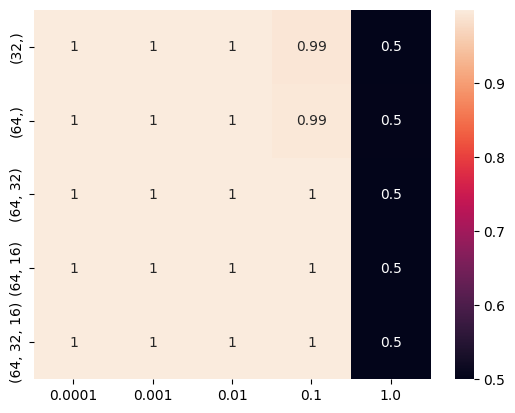

In [242]:
sns.heatmap(gscv_train_mean_df, annot=True)
plt.show;

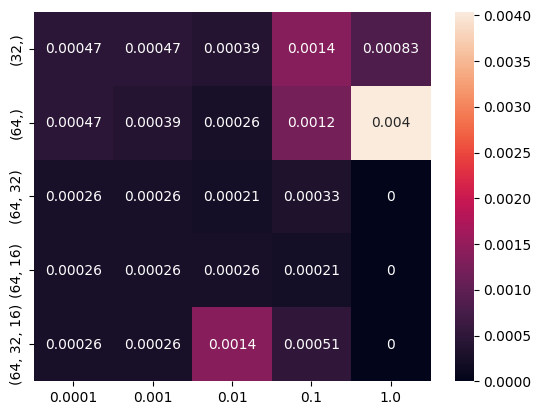

In [243]:
sns.heatmap(gscv_train_std_df,annot=True)
plt.show;

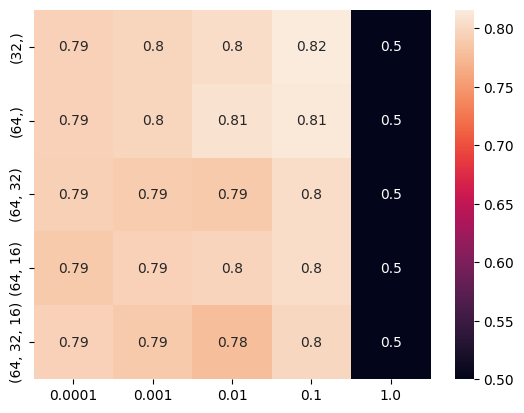

In [244]:
sns.heatmap(gscv_val_mean_df, annot=True)
plt.show;

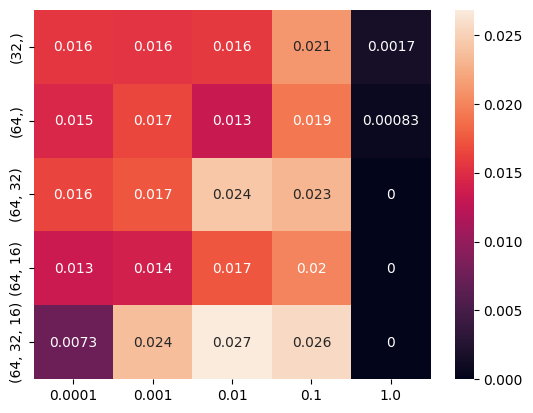

In [245]:
sns.heatmap(gscv_val_std_df, annot=True)
plt.show;

In [ ]:
sum(mlp_y_hat)

In [114]:
np.savetxt('yproba1_test.txt', mlp_y_hat)

In [275]:
gscv.best_estimator_

MLPClassifier(alpha=0.1, batch_size=32, hidden_layer_sizes=(32,), max_iter=400,
              random_state=13)

In [276]:
## Built simple model using best parameters from each of the original three models
## train them on the same 90% training data
## make predictions for each on the 10% hold out
## review what websites they got wrong most, spot check 2-3  each (6-9 total)

In [282]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold


In [327]:
final_log = LogisticRegression(C=10, penalty='l2')
final_svm = SVC(C=10, kernel='rbf')
final_mlp = MLPClassifier(hidden_layer_sizes=(32,), alpha=0.1, batch_size=32, random_state=13, max_iter=400)

In [336]:
f_strat = StratifiedKFold(n_splits=10)

In [337]:
f_strat.split(x_train_sparse, y_train)

<generator object _BaseKFold.split at 0x000001ECD4404F20>

In [338]:
for train_ind, test_ind in f_strat.split(x_train_sparse,y_train):
    f_train_index = train_ind
    f_test_index = test_ind
    break

In [339]:

f_train_sparse = x_train_sparse[f_train_index]
fy_train = y_train[f_train_index]

f_test_full = x_train_full[f_test_index]
f_test_sparse = x_train_sparse[f_test_index]
fy_test = y_train[f_test_index]

In [340]:
final_log.fit(f_train_sparse, fy_train)
final_svm.fit(f_train_sparse, fy_train)
final_mlp.fit(f_train_sparse, fy_train)

MLPClassifier(alpha=0.1, batch_size=32, hidden_layer_sizes=(32,), max_iter=400,
              random_state=13)

In [341]:
final_log_preds = final_log.predict(f_test_sparse)
final_svm_preds = final_svm.predict(f_test_sparse)
final_mlp_preds = final_mlp.predict(f_test_sparse)

In [342]:
print(sum(final_log_preds))
print(sum(final_svm_preds))
print(sum(final_mlp_preds))

119.0
115.0
118.0


In [343]:
print('Log model Score on test set:', final_log.score(f_test_sparse, fy_test))
print('SVM model Score on test set:' ,final_svm.score(f_test_sparse, fy_test))
print('MLP model Score on test set:', final_mlp.score(f_test_sparse, fy_test))

Log model Score on test set: 0.8625
SVM model Score on test set: 0.8625
MLP model Score on test set: 0.85


In [349]:
from sklearn.metrics import confusion_matrix

In [352]:
def calc_confusion_matrix_for_threshold(ytrue_N, yproba1_N, thresh=0.5):
    ''' Compute the confusion matrix for a given probabilistic classifier and threshold
    
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yproba1_N : 1D array of floats
        Each entry represents a probability (between 0 and 1) that correct label is positive (1)
        One entry per example in current dataset
        Needs to be same size as ytrue_N
    thresh : float
        Scalar threshold for converting probabilities into hard decisions
        Calls an example "positive" if yproba1 >= thresh
        Default value reflects a majority-classification approach (class is the one that gets
        highest probability)

    Returns
    -------
    cm_df : Pandas DataFrame
        Can be printed like print(cm_df) to easily display results
    '''
    cm = confusion_matrix(ytrue_N, yproba1_N >= thresh)
    cm_df = pd.DataFrame(data=cm, columns=[0, 1], index=[0, 1])
    cm_df.columns.name = 'Predicted'
    cm_df.index.name = 'True'
    return cm_df

In [369]:
print("Final Logistic Reg Model")
print(calc_confusion_matrix_for_threshold(fy_test, final_log_preds))

Final Logistic Reg Model
Predicted    0    1
True               
0          104   16
1           17  103


In [370]:
print("Final SVM Model")
print(calc_confusion_matrix_for_threshold(fy_test, final_svm_preds))

Final SVM Model
Predicted    0    1
True               
0          106   14
1           19  101


In [371]:
print("Final MLP Model")
print(calc_confusion_matrix_for_threshold(fy_test, final_mlp_preds))

Final MLP Model
Predicted    0    1
True               
0          103   17
1           19  101


In [359]:
f_test_reviews = np.array(x_tr_norm_list)[f_test_index]

In [386]:
f_test_sites = np.array(train_sites)[f_test_index]

In [361]:
def return_error_indices(preds, trues):
    #Generate indices for false positives and false negatives
    false_positives = []
    false_negatives = []

    for i in range(len(preds)):
        if preds[i] == 1:
            if trues[i] == 0:
                false_positives.append(i)
            else:
                pass
        elif preds[i] == 0:
            if trues[i] == 1:
                false_negatives.append(i)
            else:
                pass
    false_negatives = np.array(false_negatives)
    false_positives = np.array(false_positives)

    return false_positives, false_negatives
    

In [363]:
log_fp_inds, log_fn_inds = return_error_indices(final_log_preds, fy_test)
svm_fp_inds, svm_fn_inds = return_error_indices(final_svm_preds, fy_test)
mlp_fp_inds, mlp_fn_inds = return_error_indices(final_mlp_preds, fy_test)

In [399]:
print(test_sites[mlp_fn_inds])

['imdb' 'yelp' 'imdb' 'yelp' 'imdb' 'imdb' 'yelp' 'imdb' 'amazon' 'yelp'
 'yelp' 'yelp' 'yelp' 'imdb' 'amazon' 'imdb' 'yelp' 'imdb' 'yelp']


In [365]:
print(log_fp_inds)
print(svm_fp_inds)
print(mlp_fp_inds)

[  0   4  22  24  42  46  53  54  61  69  72  85  89  95  98 104]
[ 0  4 22 42 46 53 54 61 69 72 89 95 98 99]
[  0   4  17  22  42  46  53  54  61  69  72  85  89  95  98  99 104]


In [383]:
print(f_test_reviews[[0,4,61]])

['oh i forgot also mention weird color effect phone'
 'none three sizes sent heads would stay ears'
 'give bluetoooth heads time still not comfortable way fits ear']


In [367]:
print(log_fn_inds)
print(svm_fn_inds)
print(mlp_fn_inds)

[127 132 148 181 184 186 190 192 197 200 211 212 221 226 229 230 238]
[127 132 143 148 160 181 184 186 190 192 197 200 211 212 221 226 229 230
 238]
[127 132 143 148 160 184 186 190 192 196 197 200 211 212 221 226 229 230
 238]


In [384]:
print(f_test_reviews[[212,132,230]])

['their research development division obviously knows there doing'
 'plan ordering again'
 'little weeks think that sex toast rocks oozes sex right battery embedded sleek stylish leather case']


In [376]:
final_mlp.coefs_[1]

array([[-1.65639161e+00],
       [ 1.31804841e+00],
       [ 1.45290299e+00],
       [-1.44851682e+00],
       [ 1.51931112e+00],
       [ 1.51345881e+00],
       [ 1.67377755e+00],
       [ 8.66544137e-01],
       [ 1.63829274e+00],
       [-2.69858968e-88],
       [ 6.70609554e-89],
       [ 1.25757946e+00],
       [-1.60681675e+00],
       [-1.45237375e+00],
       [-1.18142589e-43],
       [-1.49857782e+00],
       [-1.31567061e+00],
       [-2.45549063e-94],
       [-1.50458448e+00],
       [-9.46107180e-01],
       [ 1.68495205e+00],
       [ 1.73079871e+00],
       [ 1.75460123e+00],
       [-1.64775868e+00],
       [ 1.61300267e+00],
       [ 1.06116221e+00],
       [ 1.34401128e+00],
       [ 1.67891009e+00],
       [ 1.65620427e+00],
       [-1.13728236e+00],
       [ 1.37578132e+00],
       [ 1.71954222e+00]])

In [400]:
final_log_y_hat = final_log.predict(x_test_sparse)
final_svm_y_hat = final_svm.predict(x_test_sparse)
final_mlp_y_hat = final_mlp.predict(x_test_sparse)


print(sum(final_log_y_hat))
print(sum(final_svm_y_hat))
print(sum(final_mlp_y_hat))


291.0
281.0
281.0


In [403]:
np.savetxt('yproba1_test.txt', final_mlp_y_hat)